In [ ]:
import pandas as pd
df = pd.read_csv('Housing_Price_Data.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Get object columns
object_columns = df.select_dtypes(include=['object']).columns
object_columns
df[object_columns].nunique()

,0
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2
prefarea,2
furnishingstatus,3


In [ ]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

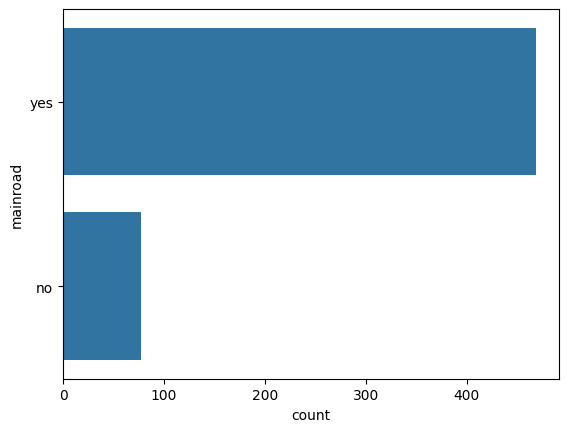

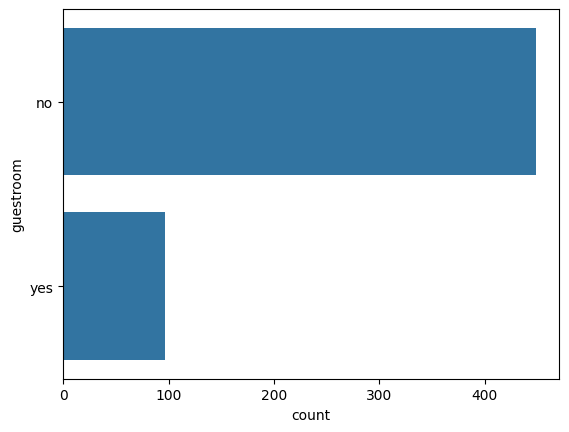

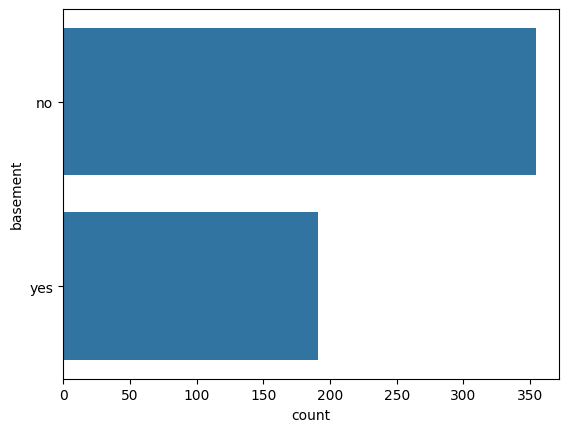

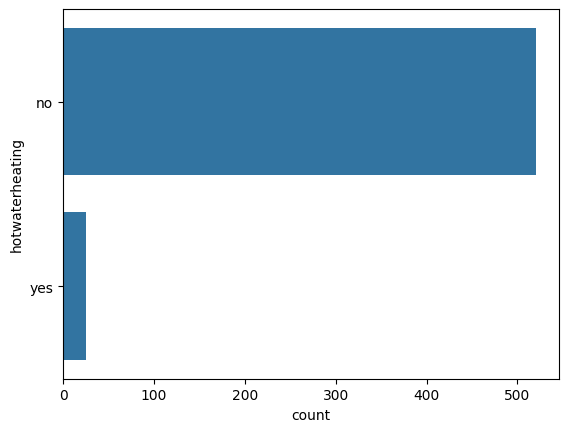

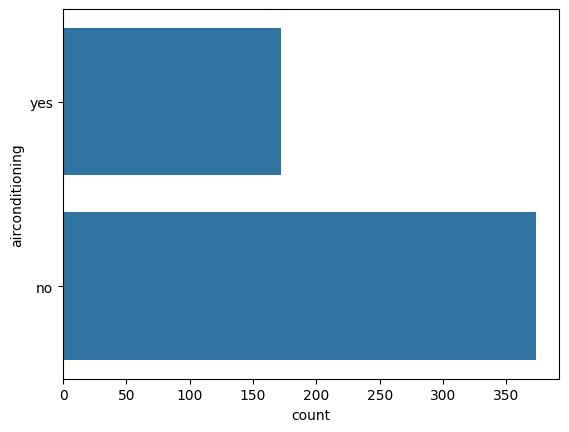

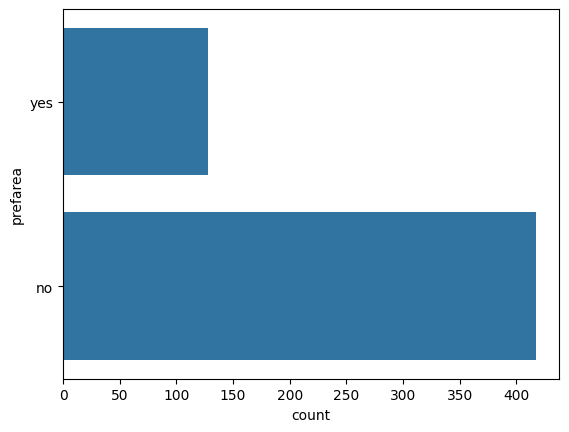

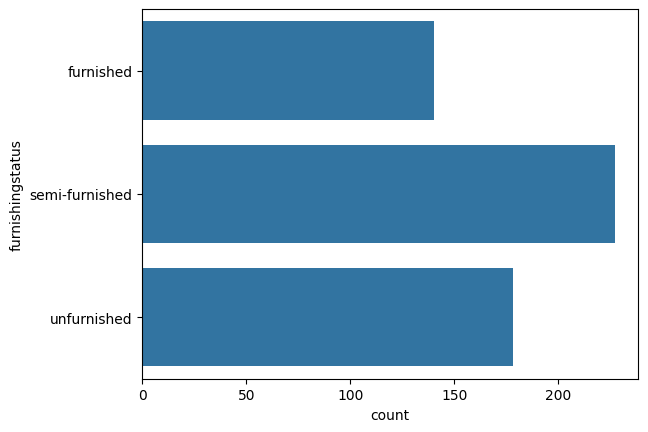

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in object_columns:
    sns.countplot(df[col])
    plt.show()

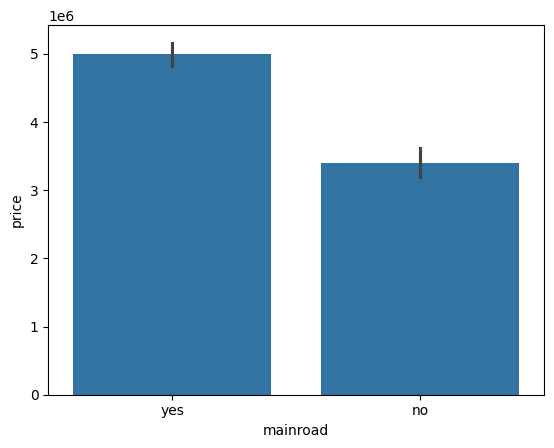

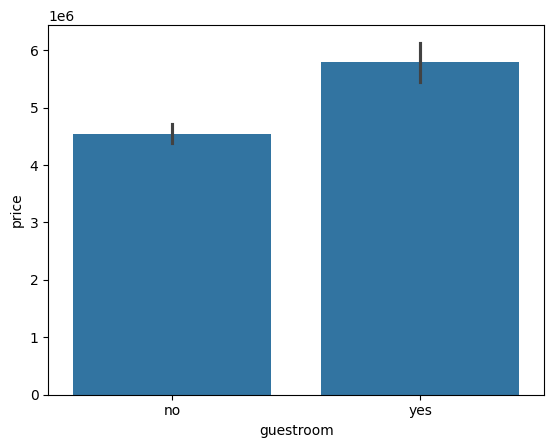

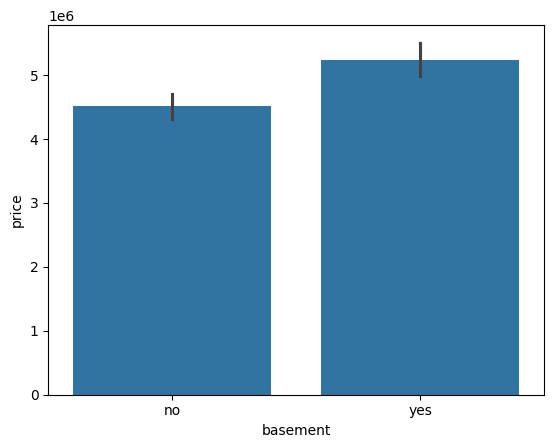

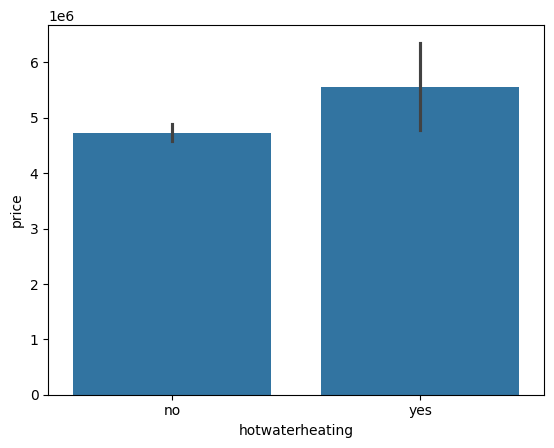

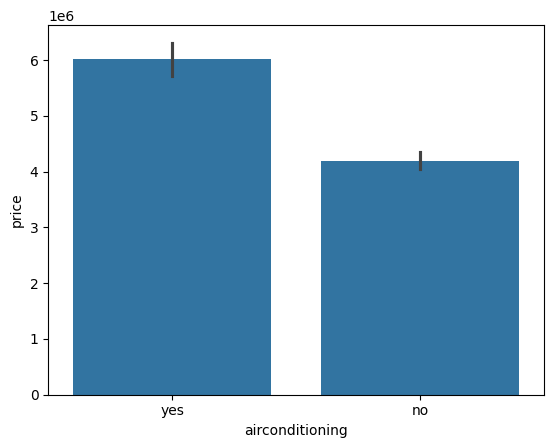

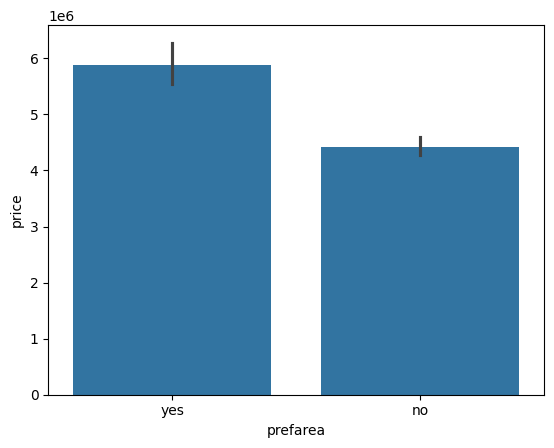

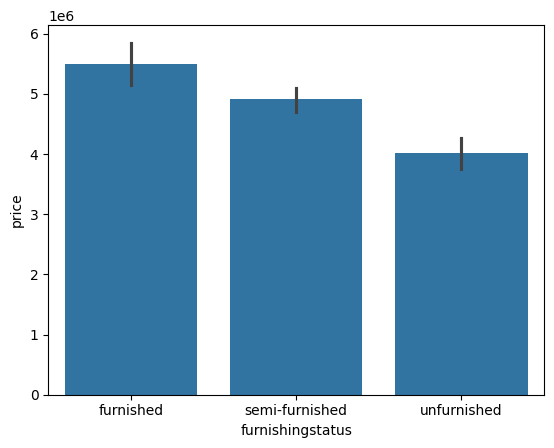

In [ ]:
# Build bar chart for object columns with price
for col in object_columns:
    sns.barplot(x=df[col], y=df['price'])
    plt.show()

<Axes: >

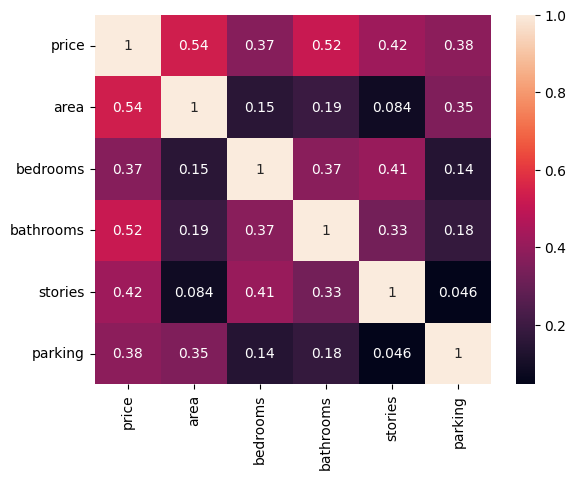

In [ ]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

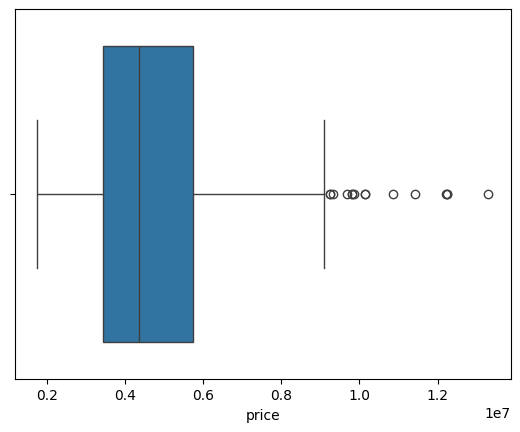

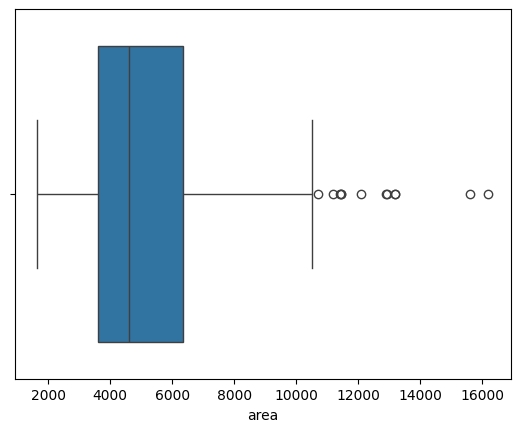

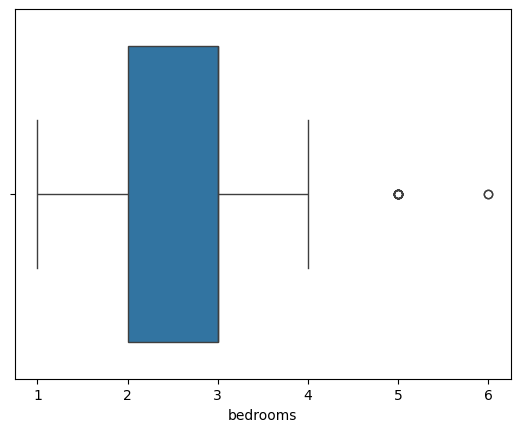

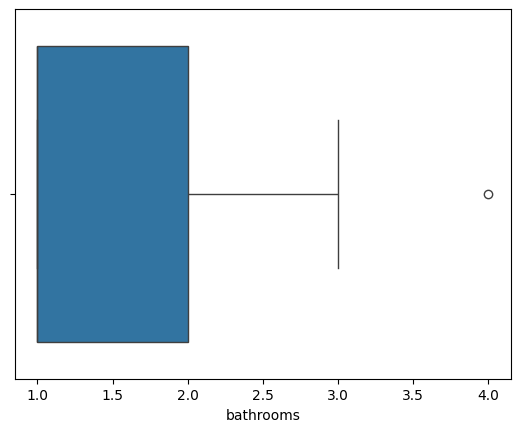

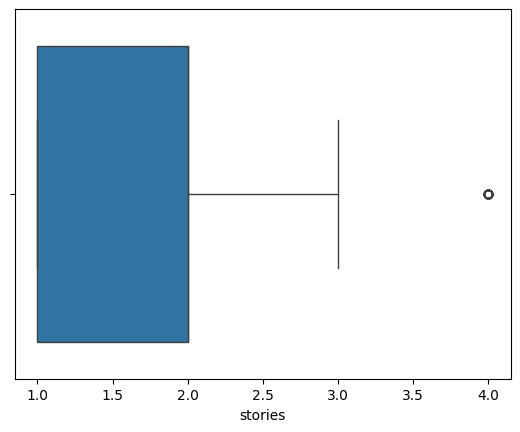

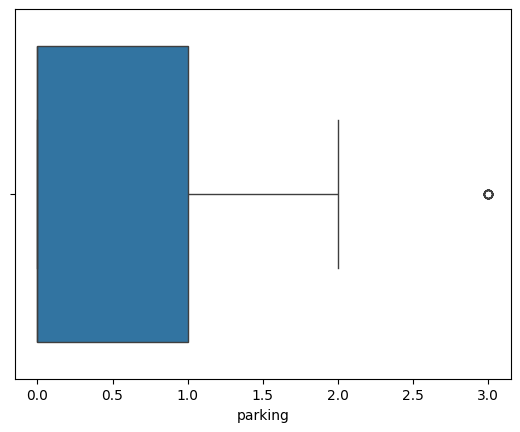

In [ ]:
# Check for outliers for numeric columns
for col in numeric_columns:
    sns.boxplot(df[col], orient = 'h')
    plt.show()

In [ ]:
df['parking'].value_counts()

,count
parking,
0,299
1,126
2,108
3,12


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
# Handle outliers
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(object_columns)
df = encoder.fit_transform(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               545 non-null    int64  
 1   area                545 non-null    int64  
 2   bedrooms            545 non-null    float64
 3   bathrooms           545 non-null    float64
 4   stories             545 non-null    float64
 5   mainroad_0          545 non-null    int64  
 6   mainroad_1          545 non-null    int64  
 7   guestroom_0         545 non-null    int64  
 8   guestroom_1         545 non-null    int64  
 9   basement_0          545 non-null    int64  
 10  basement_1          545 non-null    int64  
 11  hotwaterheating_0   545 non-null    int64  
 12  hotwaterheating_1   545 non-null    int64  
 13  airconditioning_0   545 non-null    int64  
 14  airconditioning_1   545 non-null    int64  
 15  parking             545 non-null    float64
 16  prefarea

In [ ]:
x = df.drop('price', axis = 1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
dt = DecisionTreeRegressor(max_depth = 10, min_samples_split = 3, min_samples_leaf=2)
# min_samples_split = 3 ==> Minimum number of samples required to split an internal node.
# min_samples_leaf = 2 ==> Minimum number of samples required to be at a leaf node.
# max_features = None ==> Number of features to consider when looking for the best split.
# min_impurity_decrease = 0.0 ==> A node will split if impurity decrease is greater than this value.
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mse = mean_absolute_percentage_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.25406122574753986


In [ ]:
# apply grid search
from sklearn.model_selection import GridSearchCV
a = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 3, 4]
}
grid_search = GridSearchCV(estimator = dt, param_grid = a, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=10, min_samples_leaf=2,
                                             min_samples_split=3),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 3, 4]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 3}

In [ ]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(x_test)
mse = mean_absolute_percentage_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.2617615490577366


In [ ]:
# apply grid search
from sklearn.model_selection import RandomizedSearchCV
a = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 3, 4]
}
random_search = RandomizedSearchCV(estimator = dt, param_distributions = a, cv = 5, scoring='neg_mean_squared_error')
random_search.fit(x_train, y_train)

print(random_search.best_params_)

best_dt = random_search.best_estimator_
y_pred = best_dt.predict(x_test)
mse = mean_absolute_percentage_error(y_test, y_pred)
print('MSE:', mse)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 2, 'max_depth': 5}
MSE: 0.2617615490577366


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
rf = RandomForestRegressor(n_estimators = 10, max_depth = 10, min_samples_split = 3, min_samples_leaf=2)
# min_samples_split = 3 ==> Minimum number of samples required to split an internal node.
# min_samples_leaf = 2 ==> Minimum number of samples required to be at a leaf node.
# max_features = None ==> Number of features to consider when looking for the best split.
# min_impurity_decrease = 0.0 ==> A node will split if impurity decrease is greater than this value.
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_absolute_percentage_error(y_test, y_pred)
print('MSE:', mse)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load the dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target (classes)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Perform cross-validation and get scores
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print results
print("Accuracy for each fold:", scores)
print("Average accuracy:", np.mean(scores))

Accuracy for each fold: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average accuracy: 0.9600000000000002
